In [14]:
import numpy as np
import pandas as pd
import matplotlib as mtp
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv(r'/content/SupplyChainEmissionFactorsforUSIndustriesCommodities(2015_Summary_Commodity).csv')

In [16]:
df.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.425,0.044,0.470,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.206,0.024,0.229,NaN,4,2,1,4,1


In [17]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(264, 13)
Index(['Commodity Code', 'Commodity Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Commodity Code                                          264 non-null    object 
 1   Commodity Name                                          264 non

In [18]:
df.isnull().sum()

,0
Commodity Code,0
Commodity Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,264
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


In [19]:
df.drop(['Unnamed: 7'],axis = 1,inplace=True)

In [21]:
df.shape

(264, 12)

In [24]:
df.duplicated().sum()

np.int64(0)

/tmp/ipython-input-25-2057732650.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Substance', y='Supply Chain Emission Factors with Margins', ci=None)


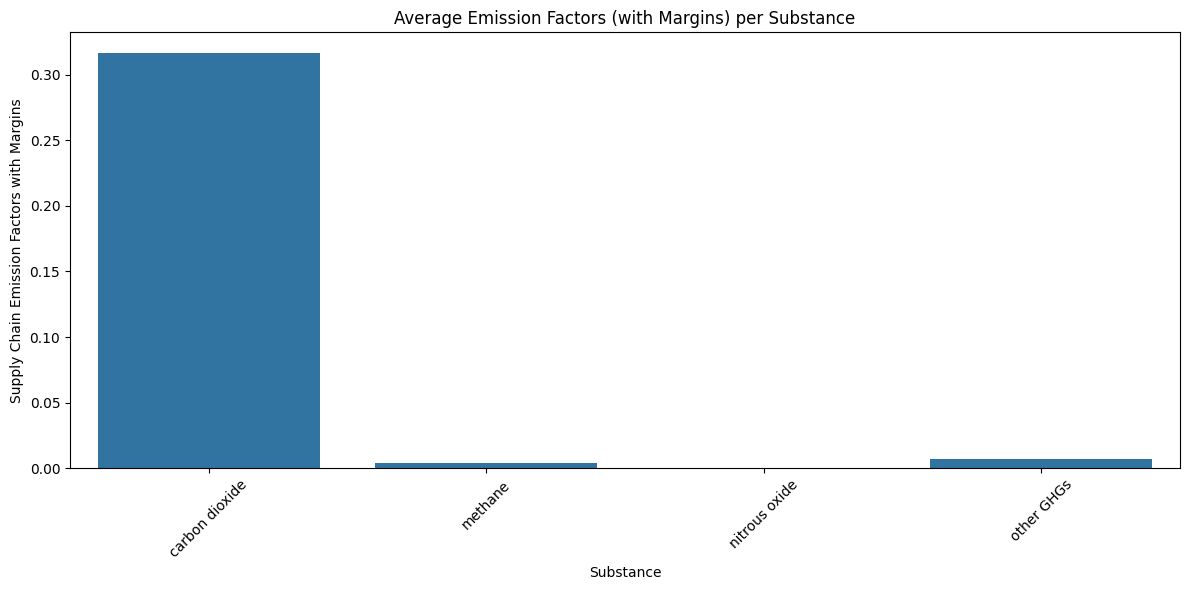

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Substance', y='Supply Chain Emission Factors with Margins', ci=None)
plt.title("Average Emission Factors (with Margins) per Substance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

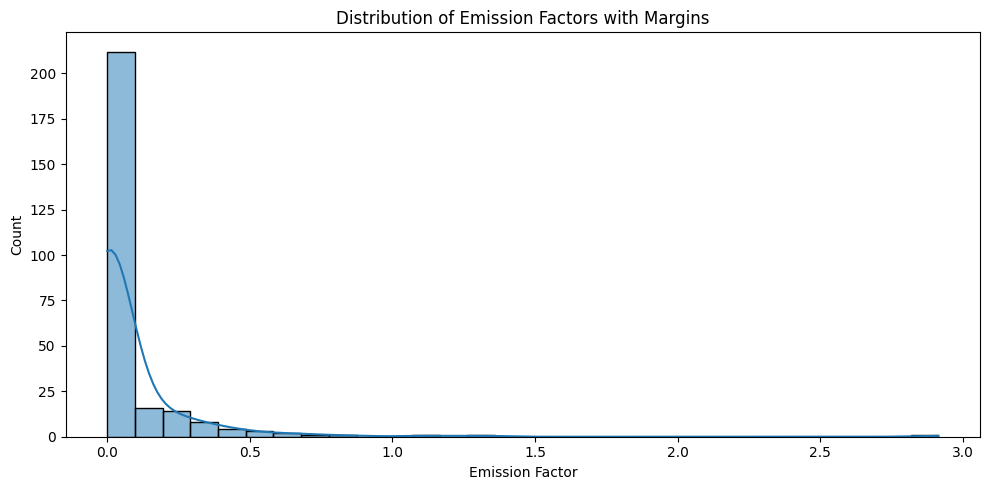

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Supply Chain Emission Factors with Margins', bins=30, kde=True)
plt.title("Distribution of Emission Factors with Margins")
plt.xlabel("Emission Factor")
plt.tight_layout()
plt.show()

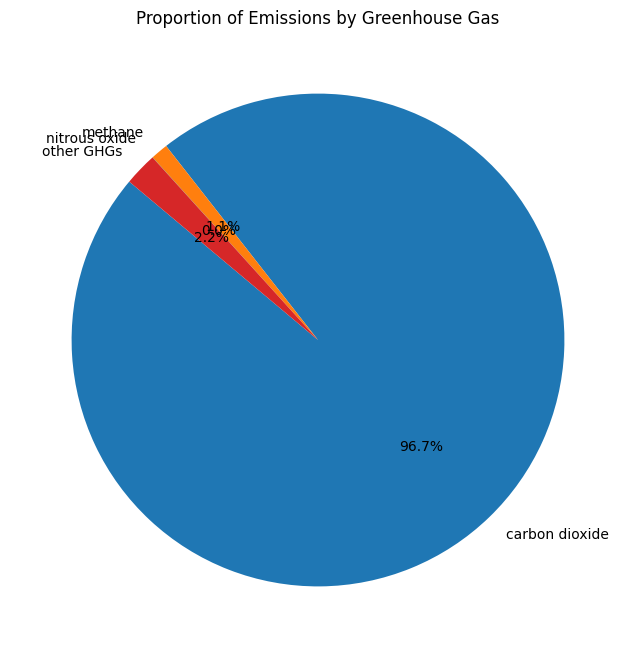

In [27]:
gas_totals = df.groupby("Substance")["Supply Chain Emission Factors with Margins"].sum()
plt.figure(figsize=(8, 8))
plt.pie(gas_totals, labels=gas_totals.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Emissions by Greenhouse Gas")
plt.show()

Index(['Commodity Code', 'Commodity Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins'],
      dtype='object')


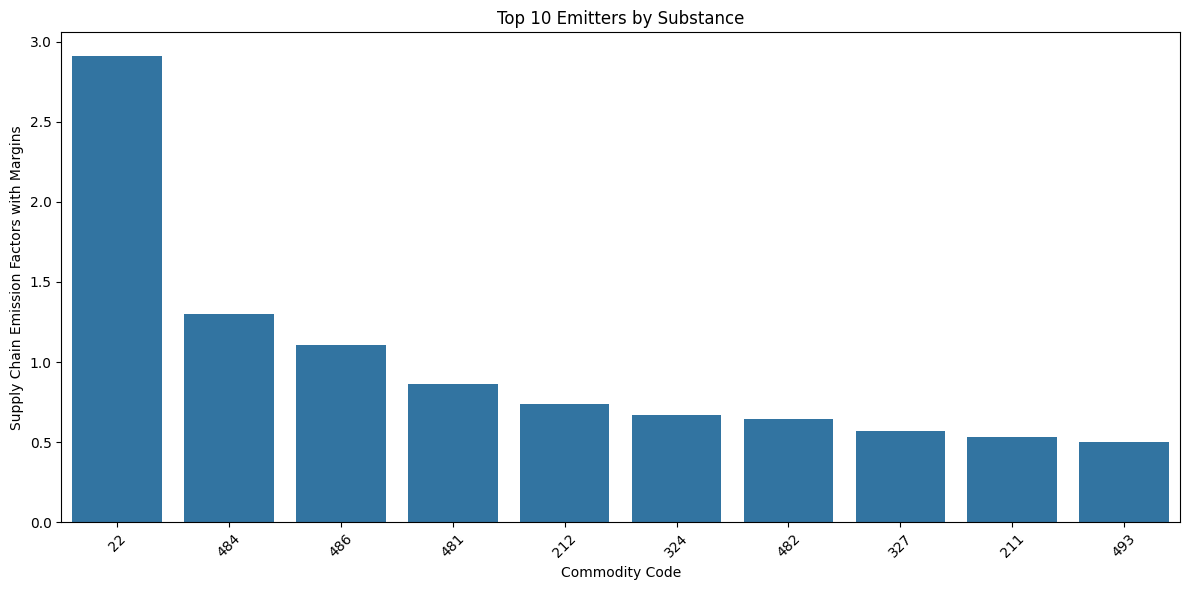

In [34]:
# Make sure these columns exist
print(df.columns)

# Set your target column based on actual names in your dataset
target_column = 'Supply Chain Emission Factors with Margins'  # example
label_column = 'Name' if 'Name' in df.columns else df.columns[0] # or 'Commodity Name' based on df.columns

# Now safely sort and get top 10
top10 = df.sort_values(by=target_column, ascending=False).head(10)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x=label_column, y=target_column)
plt.title("Top 10 Emitters by Substance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


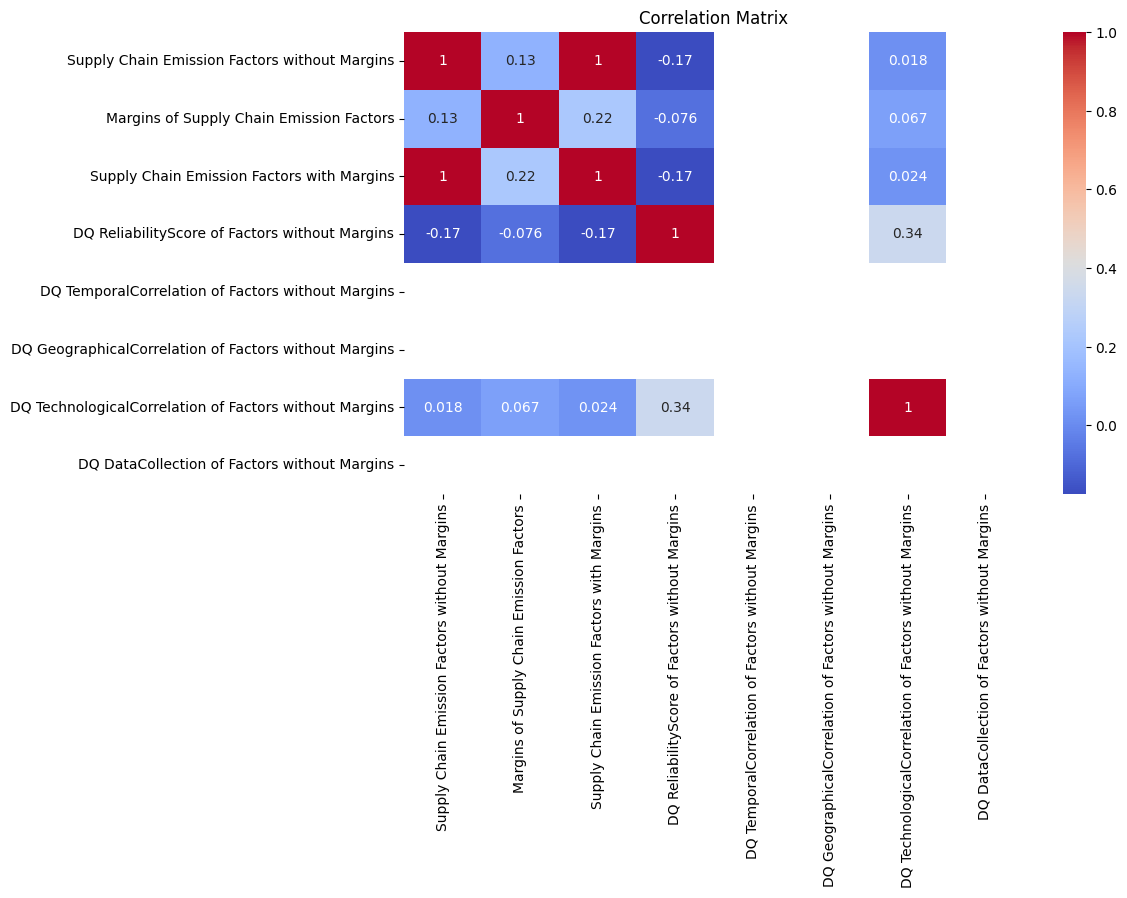

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

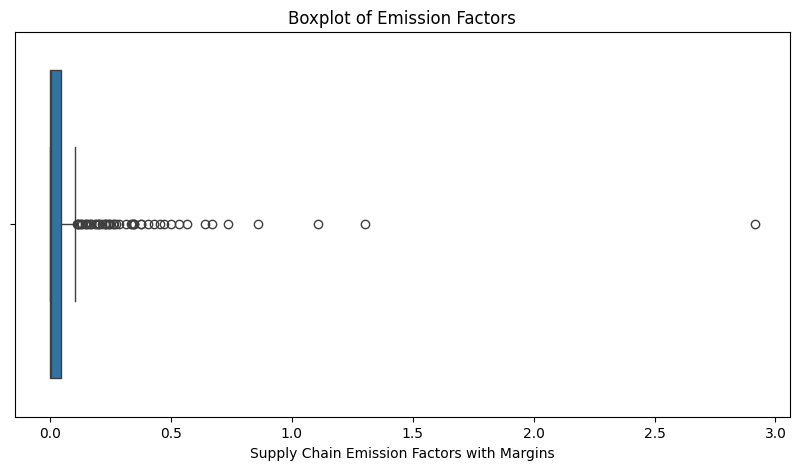

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Supply Chain Emission Factors with Margins'])
plt.title("Boxplot of Emission Factors")
plt.show()